In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
print("Exploring Risk and Volatility in the Cryptocurrency Market: \n\n"
     "2017 was a banner year for cryptocurrencies. Bitcoin peaked at just under $20,000 USD, \n"
     "quite the run up considering at the begining of the year Bitcoin was only trading at just over $1000 USD. \n"
     "Leading up to that tremdous high, it seemed like all anyone could talk about was trading cryptocurrencies. \n"
     "Everyone seemed to be making fortunes trading Bitcoin and other cryptocurrencies seemingly no one had even heard of. \n"
     "But who could have thought that we would see Bitcoin lose nearly 80% in 2018? \n"
     "Perhaps we didn't understand this new market or we couldn't predict the risk of a possible sell-off. \n"
     "So is it possible to understand the risk of cyrptocurrencies? \n"
     "Can we analyze the risk of cryptocurrencies the same way we could analyze the risk of a convential financial security? \n"
     "Let's take a look at the data! \n")

Exploring Risk and Volatility in the Cryptocurrency Market: 

2017 was a banner year for cryptocurrencies. Bitcoin peaked at just under $20,000 USD, 
quite the run up considering at the begining of the year Bitcoin was only trading at just over $1000 USD. 
Leading up to that tremdous high, it seemed like all anyone could talk about was trading cryptocurrencies. 
Everyone seemed to be making fortunes trading Bitcoin and other cryptocurrencies seemingly no one had even heard of. 
But who could have thought that we would see Bitcoin lose nearly 80% in 2018? 
Perhaps we didn't understand this new market or we couldn't predict the risk of a possible sell-off. 
So is it possible to understand the risk of cyrptocurrencies? 
Can we analyze the risk of cryptocurrencies the same way we could analyze the risk of a convential financial security? 
Let's take a look at the data! 



In [14]:
# Load https://api.coinmarketcap.com/v1/ticker/?limit=0 and store as a DataFrame
path = 'https://api.coinmarketcap.com/v1/ticker/?limit=0'
api = pd.read_json(path)
#api.to_csv("coinmarket_api.csv", index=False)

print("This is an API from coinmarketcap.com. It contains data for 100 cryptocurrencies currently trading in the market. \n"
     "The data includes name, price, market capitalization, and the 1 hour, 1 day, and 7 day return, \n"
     "all of which will be immensley useful in understanding the risk of these financial instruments.")

api.head()

This is an API from coinmarketcap.com. It contains data for 100 cryptocurrencies currently trading in the market. 
The data includes name, price, market capitalization, and the 1 hour, 1 day, and 7 day return, 
all of which will be immensley useful in understanding the risk of these financial instruments.


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,4.594457e+09,17455775,bitcoin,1546305262,65440473543,2.100000e+07,Bitcoin,0.09,-2.69,-5.20,1.000000,3748.929712,1,BTC,17455775
1,4.788215e+08,40794121066,ripple,1546305243,14380279738,1.000000e+11,XRP,0.11,-4.32,-9.82,0.000094,0.352509,2,XRP,99991738974
2,2.292319e+09,104124720,ethereum,1546305257,13949328812,NaN,Ethereum,0.44,-3.28,-0.62,0.035713,133.967503,3,ETH,104124720
3,1.885969e+08,17541488,bitcoin-cash,1546305252,2697322984,2.100000e+07,Bitcoin Cash,2.19,-4.69,-10.43,0.040992,153.768201,4,BCH,17541488
4,7.356238e+08,906245118,eos,1546305251,2326695838,NaN,EOS,0.20,-3.23,-5.42,0.000684,2.567402,5,EOS,1006245120


In [12]:
# Save the API data to a csv file so we can work with a specific data set
df = pd.read_csv('coinmarket_api.csv')

print("Let's download the API data to a csv file so we can work with a specific dataset.")

df.head()

Let's download the API data to a csv file so we can work with a specific dataset.


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,4.933838e+09,17453237,bitcoin,1546194561,67520811077,2.100000e+07,Bitcoin,0.03,-0.58,-3.64,1.000000,3868.669810,1,BTC,17453237
1,5.287510e+08,40794121066,ripple,1546194542,14963327244,1.000000e+11,XRP,0.03,-0.92,-1.03,0.000095,0.366801,2,XRP,99991738974
2,2.915749e+09,104100478,ethereum,1546194560,14429233936,NaN,Ethereum,0.12,1.97,6.80,0.035810,138.608719,3,ETH,104100478
3,2.858038e+08,17539163,bitcoin-cash,1546194554,2867597314,2.100000e+07,Bitcoin Cash,0.33,-1.39,-17.98,0.042240,163.496821,4,BCH,17539163
4,7.454101e+08,906245118,eos,1546194554,2399308781,NaN,EOS,-0.66,0.54,-6.28,0.000684,2.647527,5,EOS,1006245120


In [15]:
print("Let's explore the dataset. First, let's look at the top 10 largest cryptocurrencies by market capitalization. \n"
     "But first, market capitalization is the total dollar market value of a company's outstanding shares. \n"
     "Another way to think of it is price of an asset * supply.")

Let's explore the dataset. First, let's look at the top 10 largest cryptocurrencies by market capitalization. 
But first, market capitalization is the total dollar market value of a company's outstanding shares. 
Another way to think of it is price * supply.


In [125]:
# Select the columns id and market_cap_usd
market_cap_df = df.loc[:,['id','market_cap_usd']]

# Drop any cryptos with a market cap of zero
market_cap_df = market_cap_df.query('market_cap_usd > 0')

# Set index as the 'id' column, this will help with visualization later
market_cap_df = market_cap_df.set_index('id')

print("Some of these names look familiar, as we can expect with the top cryptocurrencies in the market. \n"
     "But billions and billions of dollars can be hard to put in perspective. Let's look at the big picture.")

market_cap_df.head()

Some of these names look familiar, as we can expect with the top cryptocurrencies in the market. 
But billions and billions of dollars can be hard to put in perspective. Let's look at the big picture.


,market_cap_usd
id,
bitcoin,67520811077
ripple,14963327244
ethereum,14429233936
bitcoin-cash,2867597314
eos,2399308781


In [30]:
# First let's find the market capitalization of each coin as a percentage
market_cap_df = market_cap_df.assign(market_cap_perc =
    lambda x: (x.market_cap_usd / market_cap_df.market_cap_usd.sum()) * 100)

print("Now we can clearly see that the market capitalization of Bitcoin is over 50% of the total cryptocurrency market.")

market_cap_df.head()

Here we can more clearly see that the market capitalization of Bitcoin is over 50% of the total cryptocurrency market.


,market_cap_usd,market_cap_perc
id,,
bitcoin,67520811077,53.773453
ripple,14963327244,11.916767
ethereum,14429233936,11.491416
bitcoin-cash,2867597314,2.283749
eos,2399308781,1.910805


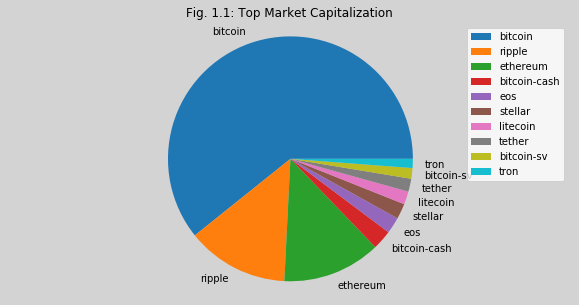

Not only does Bitcoin dominate over half the cryptocurrency market, but no other coin even comes close to it in size.


In [39]:
# Let's look at the top 10 cryptocurrencies

plt.figure(figsize=(10, 5), facecolor='lightgrey')

xy = market_cap_df['market_cap_usd'].head(10).plot.pie(title='Fig. 1.1: Top Market Capitalization', cmap='tab10')
plt.axis('equal')
plt.legend(df['id'])
xy.set_ylabel('') # ylabel is not very informative

plt.show()

print("Not only does Bitcoin dominate over half the cryptocurrency market, but no other coin even comes close to it in size.")

In [35]:
print("Now let's take a look at some price data. Can we spot any trends or patterns?")

# Select the columns id, price_btc, and price_usd and assign to price_df
price_df = df.loc[:,['id','price_btc', 'price_usd']]

# Sort the price data in descending order
price_df = price_df.sort_values('price_usd', ascending=False)

price_df.head()

Now let's take a look at some price data. Can we spot any trends or patterns?


,id,price_btc,price_usd
0,bitcoin,1.000000,3868.669810
18,maker,0.121459,470.125495
3,bitcoin-cash,0.042240,163.496821
2,ethereum,0.035810,138.608719
8,bitcoin-sv,0.022960,88.870708


Let's visualize the distribution of the price data.


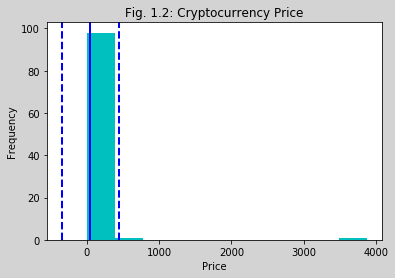

In [38]:
print("Let's visualize the distribution of the price data... ")

plt.figure(facecolor='lightgrey')

plt.hist(price_df['price_usd'], bins=10, color='c')

plt.axvline(price_df['price_usd'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].mean() + price_df['price_usd'].std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].mean() - price_df['price_usd'].std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Fig. 1.2: Cryptocurrency Price')

plt.show()

print("At first, this looks like it must have been plotted incorrectly.\n"
      "All of the data is clumped at one end of the aixs, it's in no way distributed, and it doesn't tell us much at all.\n"

Let's see if we can find out more by looking at the top and bottom ranges of the price data.


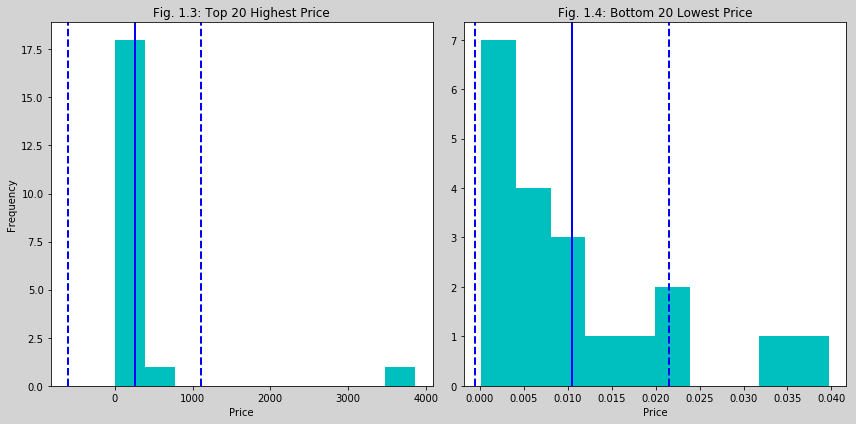

This is a little more informative, but still not great.
Even of the top 20 highest priced cryptocurrencies, the data is clumped at the lower end of the range.
It seems like the majority of cryptocurrencies aren't very valuable and the market is dominated
by a few high-priced outliers.


In [43]:
print("Let's see if we can find out more by looking at the top and bottom ranges of the price data.")

# Set figure size for subplots
plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='lightgrey')

# Plot histogram of top 20 highest price
plt.subplot(1,2,1)

plt.hist(price_df['price_usd'].head(20), bins=10, color='c')

plt.axvline(price_df['price_usd'].head(20).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].head(20).mean() + price_df['price_usd'].head(20).std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].head(20).mean() - price_df['price_usd'].head(20).std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Fig. 1.3: Top 20 Cryptocurrencies by Price')

# Plot histogram of bottom 20 lowest price
plt.subplot(1,2,2)

plt.hist(price_df['price_usd'].tail(20), bins=10, color='c')

plt.axvline(price_df['price_usd'].tail(20).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].tail(20).mean() + price_df['price_usd'].tail(20).std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].tail(20).mean() - price_df['price_usd'].tail(20).std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('')
plt.title('Fig. 1.4: Bottom 20 Cryptocurrencies by Price')

plt.tight_layout()
plt.show()

print("This is a little more informative, but still not great.\n"
     "Even of the top 20 highest priced cryptocurrencies, the data is clumped at the lower end of the range.\n"
     "It seems like the majority of cryptocurrencies aren't very valuable and the market is dominated\n"
     "by a few high-priced outliers.")

Let's look at a scatter plot of the top and bottom of the cryptocurrency market by price.


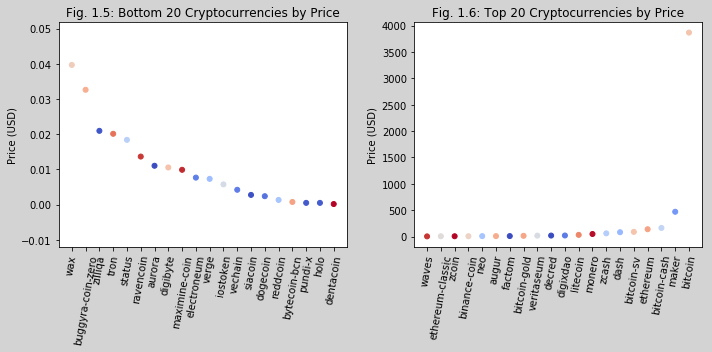

As we expected, most of the prices are in a tight range, and the larger cryptocurrencies, like Bitcoin,
are far, far out of that range.


In [48]:
print("Let's look at a scatter plot of the top and bottom of the cryptocurrency market by price.")

#price_df = price_df.sort_values('price_usd', ascending=True)

plt.subplots(nrows=1, ncols=3, figsize=(10, 5), facecolor='lightgrey')

plt.subplot(1,2,1)

x = price_df.sort_values('price_usd', ascending=False)['id'].tail(20)
y = price_df.sort_values('price_usd', ascending=False)['price_usd'].tail(20)
c = np.random.rand(x.count())**2
xy = plt.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

plt.xlabel('')
plt.xticks(rotation=80)
plt.ylabel('Price (USD)')
#plt.yscale('log')
plt.title('Fig. 1.5: Bottom 20 Cryptocurrencies by Price')

plt.subplot(1,2,2)

x = price_df.sort_values('price_usd', ascending=True)['id'].tail(20)
y = price_df.sort_values('price_usd', ascending=True)['price_usd'].tail(20)
c = np.random.rand(x.count())**1/2

xy = plt.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

plt.xlabel('')
plt.xticks(rotation=80)
plt.ylabel('Price (USD)')
#plt.yscale('log')
plt.title('Fig. 1.6: Top 20 Cryptocurrencies by Price')

plt.tight_layout()
plt.show()

print("As we expected, most of the prices are in a tight range, and the larger cryptocurrencies, like Bitcoin,\n"
     "are very far out of that range.")

In [51]:
print("Now that we've explored the cryptocurrency market a bit, we've learned that Bitcoin makes over half the market.\n"
     "Conversely that means that the rest of the market is comprised of many small, low-value coins.\n"
     "Historically, lower value stocks, like penny stocks, are known for their high risk-return profile.\n"
     "In other words, high volatility. This could explain the tumultuous volatility we saw in 2018.")

Now that we've explored the cryptocurrency market a bit, we've learned that Bitcoin makes over half the market.
Conversely that means that the rest of the market is comprised of many small, low-value coins.
Historically, lower value stocks, like penny stocks, are known for their high risk-return profile.
In other words, high volatility. This could explain the tumultuous volatility we saw in 2018.


In [52]:
print("Let's take a look at volatility and see if we can glean any insights to the cryptocurrency market as a whole.\n"
     "Luckily, the data contains information of price changes over a 24 hour and 7 day time period.\n"
     "We can use this to approximately volatility.")

# Store the columns 'id', 'percent_change_24h' and 'percent_change_7d' as a DataFrame named volatility
volatility = df.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# set the index to id and drop all NAs
volatility = volatility.set_index('id').dropna()

# sort volatility by percent_change_24h
volatility = volatility.sort_values('percent_change_24h', ascending=True)


volatility.head()

Let's take a look at volatility and see if we can glean any insights to the cryptocurrency market as a whole.
Luckily, the data contains information of price changes over a 24 hour and 7 day time period.
We can use this to approximately volatility.


,percent_change_24h,percent_change_7d
id,,
stasis-eurs,-5.62,3.15
revain,-5.47,-3.41
odem,-4.68,-27.32
buggyra-coin-zero,-4.58,-4.46
aurora,-4.35,-11.76


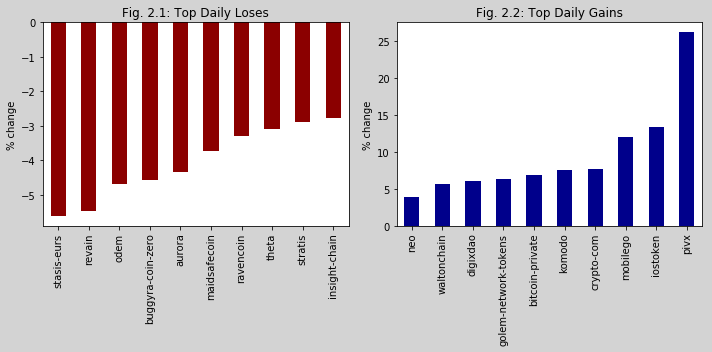

Here we can get a sense of the daily volatility of the cryptocurrency market. 
In Fig. 2.1 we can see that in the biggest daily loses in the cryptocurrency market topped out at -5%, 
and in Fig. 2.2 we can see that some cryptocurrencies jumped as much as 25% in one day!That's a lot of volatility for one day. Thankfully, most of it is in the black, not the red. 
But this is just the day-to-day. Theoretically, volatility should smooth out over time. 
So let's compare this to weekly volatility and see if it's less dramatic than the daily volatility.


In [77]:
# sort volatility by percent_change_24h
volatility = volatility.sort_values('percent_change_24h', ascending=True)

# set shape of subplots
plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(1,2,1)

volatility.percent_change_24h[:10].plot.bar(color="darkred")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.1: Top Daily Loses')

# plot top weekly gains
plt.subplot(1,2,2)

volatility.percent_change_24h[-10:].plot.bar(color='darkblue')

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.2: Top Daily Gains')

plt.tight_layout()
plt.show()

print("Here we can get a sense of the daily volatility of the cryptocurrency market. \n"
     "In Fig. 2.1 we can see that in the biggest daily loses in the cryptocurrency market topped out at -5%, \n"
     "and in Fig. 2.2 we can see that some cryptocurrencies jumped as much as 25% in one day!"
     "That's a lot of volatility for one day. Thankfully, most of it is in the black, not the red. \n"
     "But this is just the day-to-day. Theoretically, volatility should smooth out over time. \n"
     "So let's compare this to weekly volatility and see if it's less dramatic than the daily volatility.")

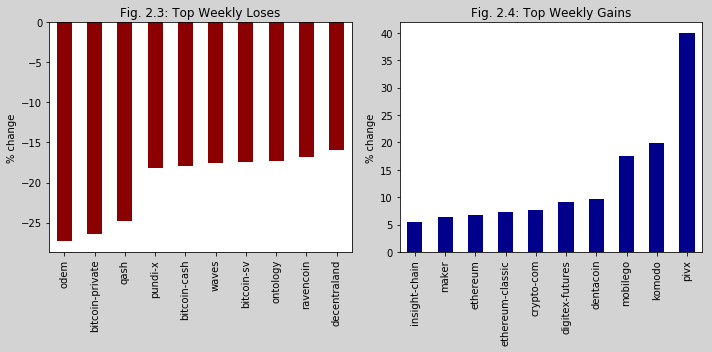

Woah! The weekly gains and loses are even more dramatic than the daily! 
The daily loses bottomed out at -%5, but the weekly tanked to as much as -25%. 
But on a positive note, while the daily gains were capped at 25%, the weekly gains soared as high as 40%.


In [135]:
# sort volatility by percent_change_7d
volatility = volatility.sort_values('percent_change_7d', ascending=True)

# set shape of subplots
plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(1,2,1)

volatility.percent_change_7d[:10].plot.bar(color="darkred")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.3: Top Weekly Loses')

# plot top weekly gains
plt.subplot(1,2,2)

volatility.percent_change_7d[-10:].plot.bar(color='darkblue')

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.4: Top Weekly Gains')

plt.tight_layout()
plt.show()

print("Woah! The weekly gains and loses are even more dramatic than the daily! \n"
     "The daily loses bottomed out at -%5, but the weekly tanked to as much as -25%. \n"
     "But on a positive note, while the daily gains were capped at 25%, the weekly gains soared as high as 40%.")

In [129]:
print("Turns out the percent change in price over a 24 hour and 7 day period doesn't lend as much insight \n"
      "in the volatility of the cryptocurreny market as we hoped. Perhaps we're looking at an unusual time frame, \n"
      "or perhaps those many, tiny cryptocurrencies we observed earlier are skewing the market? \n"
     "Let's look at a cross section of the cryptocurrency market by market capitalization and see if that clears this up.\n\n"
     "We'll use Investopedia's definitions of market capitalization where: \n"
     "Large cap: +10 billion \n"
     "Mid cap: 2 billion - 10 billion \n"
     "Small cap: 300 million - 2 billion \n"
     "Micro cap: 50 million - 300 million \n"
     "Nano cap: Below 50 million")

Turns out the percent change in price over a 24 hour and 7 day period doesn't lend as much insight 
in the volatility of the cryptocurreny market as we hoped. Perhaps we're looking at an unusual time frame, 
or perhaps those many, tiny cryptocurrencies we observed earlier are skewing the market? 
Let's look at a cross section of the cryptocurrency market by market capitalization and see if that clears this up.

We'll use Investopedia's definitions of market capitalization where: 
Large cap: +10 billion 
Mid cap: 2 billion - 10 billion 
Small cap: 300 million - 2 billion 
Micro cap: 50 million - 300 million 
Nano cap: Below 50 million


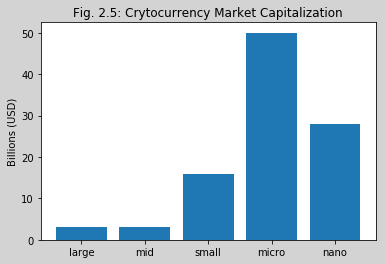

Just like we saw before, the crypocurrency market is dominated by many very small coins. It's possible that if we 
limit our analysis to coins with a larger market capitalization, we'll start to see more normal behavior. 
As financial securities with smaller market capitalization are known for their 'huge gains, crushing losses, 
and all-around high volatility' according to NASDAQ.


In [101]:
# Let's reload the market_cap_df DataFrame
market_cap_df = df.loc[:,['id','market_cap_usd']]

# create a list of labels
labels = ["large", "mid", "small", "micro", "nano"]

# divide cryptocurrencies by market capitalization
large = market_cap_df.query('market_cap_usd > 10000000000')
large = large.count().id

mid = market_cap_df.query('10000000000 > market_cap_usd > 2000000000')
mid = mid.count().id

small = market_cap_df.query('2000000000 > market_cap_usd > 300000000')
small = small.count().id

micro = market_cap_df.query('300000000 > market_cap_usd > 50000000')
micro = micro.count().id

nano = market_cap_df.query('market_cap_usd < 50000000')
nano = nano.count().id

# create a list of values
values = [large, mid, small, micro, nano]

# plot
plt.figure(facecolor='lightgrey')

plt.bar(range(len(values)), values, tick_label=labels)

plt.title('Fig. 2.5: Crytocurrency Market Capitalization')
plt.ylabel('Billions (USD)')

plt.show()

print("Just like we saw before, the crypocurrency market is dominated by many very small coins. It's possible that if we \n"
     "limit our analysis to coins with a larger market capitalization, we'll start to see more normal behavior. \n"
     "As financial securities with smaller market capitalization are known for their 'huge gains, crushing losses, \n"
     "and all-around high volatility' according to NASDAQ.")

In [106]:
print("Let's filter the data for just coins that have a market capitalization greater than micro and nano. \n"
     "Ideally, these larger cap coins will behave in manner more similar to traditional financial securities.")

# query() the df and filter out all the micro and nano-cap cryptocurrencies and save as blue_chip 
blue_chip = df.query('market_cap_usd > 300000000')


print("This limits us to the {} largest cryptocurrenies by market capitaliation. "
      "Let's get analyzing!".format(blue_chip.id.count()))

Let's filter the data for just coins that have a market capitalization greater than micro and nano. 
Ideally, these larger cap coins will behave in manner more similar to traditional financial securities.
22
This limits us to the 22 largest cryptocurrenies by market capitaliation. Let's get analyzing!


In [108]:
print("First, let's view the volatility of these 'blue chip' cryptocurrencies. \n"
     "Blue chip stocks are 'high-valued, long-term investments' that are 'known for stable earnings' \n"
     "according to Investopedia. We'll see if that's the case with cryptocurrencies!")

# Create a DataFrame that contains volatility information on cryptocurrencies.

# Selecting the id, percent_change_24h and percent_change_7d columns
blue_chip_v = blue_chip.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# Set the index to id and drop all rows that contain NaNs.
blue_chip_v = blue_chip_v.set_index('id').dropna()

#Sort volatility by percent_change_24h in ascending order.
blue_chip_v_24h = blue_chip_v.sort_values('percent_change_24h', ascending=True)

# view the .head() of volatility
blue_chip_v.head()

First, let's view the volatility of these 'blue chip' cryptocurrencies. 
Blue chip stocks are 'high-valued, long-term investments' that are 'known for stable earnings' 
according to Investopedia. We'll see if that's the case with cryptocurrencies!


,percent_change_24h,percent_change_7d
id,,
bitcoin,-0.58,-3.64
ripple,-0.92,-1.03
ethereum,1.97,6.80
bitcoin-cash,-1.39,-17.98
eos,0.54,-6.28


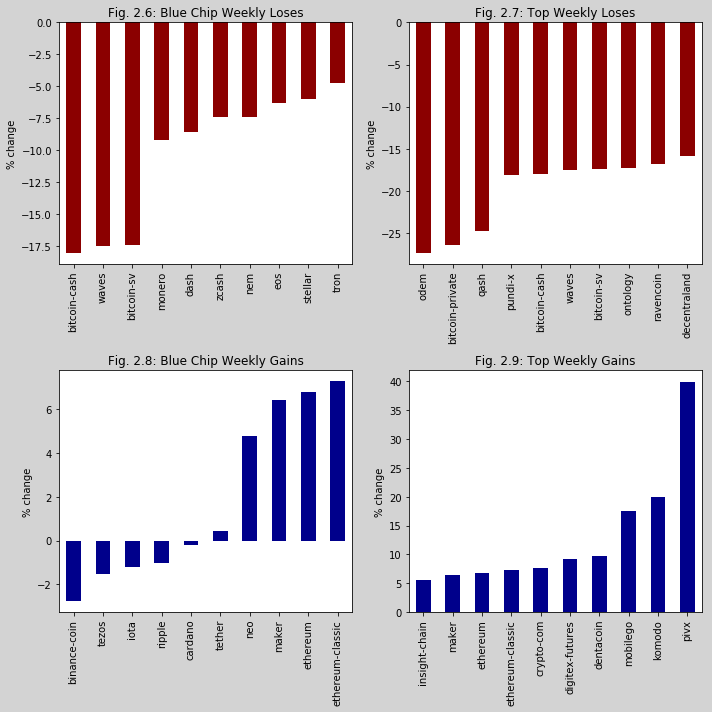

Now we can see a clear comparison of the weekly gains/loses of the market vs. our 'blue chip' cryptocurrencies. 
The data shows that the blue chip cryptocurrencies aren't much safer than the say any other currency in the market. 
The blue chip's weekly loses topped out at around -17.5% vs. -25% marketwide, which is less, 
and that's what we would expect, but it's not less by that much. 
On the other hand, the weekly gains for the blue chips was eclipsed by the weekly gains of the market. 
If you invested in the the righty crytocurrency you could have made up to a 40% return, 
but the best you could have down with one of our blue chips was 6%. 6% vs. 40% is a very significant discrepancy. 
Considering the marginal reducion in risk, the risk-return benefit of the blue chip cryptocurrencies just isn'there.


In [128]:
# sort volatility by percent_change_7d
blue_chip_v = blue_chip_v.sort_values('percent_change_7d', ascending=True)

# sort volatility by percent_change_7d
volatility = volatility.sort_values('percent_change_7d', ascending=True)

# set shape of subplots
plt.subplots(nrows=2, ncols=2, figsize=(10, 10), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(2,2,1)

blue_chip_v.percent_change_7d[:10].plot.bar(color="darkred")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.6: Blue Chip Weekly Loses')

# plot top weekly gains
plt.subplot(2,2,2)

volatility.percent_change_7d[:10].plot.bar(color="darkred")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.7: Top Weekly Loses')

# plot top weekly loses
plt.subplot(2,2,3)

blue_chip_v.percent_change_7d[-10:].plot.bar(color="darkblue")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.8: Blue Chip Weekly Gains')

# plot top weekly gains
plt.subplot(2,2,4)

volatility.percent_change_7d[-10:].plot.bar(color="darkblue")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.9: Top Weekly Gains')

plt.tight_layout()
plt.show()

print("Now we can see a clear comparison of the weekly gains/loses of the market vs. our 'blue chip' cryptocurrencies. \n"
     "The data shows that the blue chip cryptocurrencies aren't much safer than the say any other currency in the market. \n"
     "The blue chip's weekly loses topped out at around -17.5% vs. -25% marketwide, which is less, \n"
     "and that's what we would expect, but it's not less by that much. \n"
     "On the other hand, the weekly gains for the blue chips was eclipsed by the weekly gains of the market. \n"
     "If you invested in the the righty crytocurrency you could have made up to a 40% return, \n"
     "but the best you could have down with one of our blue chips was 6%. 6% vs. 40% is a very significant discrepancy. \n"
     "Considering the marginal reducion in risk, the risk-return benefit of the blue chip cryptocurrencies just isn'there.")

In [131]:
print("Another measure of risk is beta, which measures risk against the overall market. \n"
     "We can use beta to understand the risk of a specific crytocurrency or group of cryptocurrencies \n"
     "against the risk of the overall cryptocurrency market. \n"
     "We can test the hypothesis that higher-value cryptocurrencies with larger market capitalizations \n"
     "will have a less risky beta, and we can compare that to the beta of the largest cryptocurrency: bitcoin, \n"
     "to lend us some perspective. \n\n"
     "To calculate beta, we need three pieces of data, a risk free rate of return--say of a treasury bill or \n"
     "short term government bond, the return of the security we're measuring, and the overall return of the market. \n\n"
     "We can approximate a risk free rate of return as 2%. To find beta, we find the difference between \n"
     "The return of the cryptocurrency we're measuring and the risk free rate divided by the difference \n" 
     "of the overall market return and the risk free rate. \n\n"
     "beta = (asset return - risk free rate) / (market return - risk free rate) \n\n"
     "To understand beta, we can use this easy guide: \n"
     "Beta < 1 the asset is less volatile than the market \n"
     "Beta > 1 the asset is more volatile than the market \n"
     "Beta = 1 the asset is as volatile than the market \n"
     "Beta < 0 the asset is depreciating while the market is gaining \n")

# First create a DataFrame
beta_df = df.loc[:, ['id', 'market_cap_usd', 'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd']]

beta_df.head()

Another measure of risk is beta, which measures risk against the overall market. 
We can use beta to understand the risk of a specific crytocurrency or group of cryptocurrencies 
against the risk of the overall cryptocurrency market. 
We can test the hypothesis that higher-value cryptocurrencies with larger market capitalizations 
will have a less risky beta, and we can compare that to the beta of the largest cryptocurrency: bitcoin, 
to lend us some perspective. 

To calculate beta, we need three pieces of data, a risk free rate of return--say of a treasury bill or 
short term government bond, the return of the security we're measuring, and the overall return of the market. 

We can approximate a risk free rate of return as 2%. To find beta, we find the difference between 
The return of the cryptocurrency we're measuring and the risk free rate divided by the difference 
of the overall market return and the risk free rate. 

beta = (asset return - risk free rate) / (market return - ris

,id,market_cap_usd,percent_change_24h,percent_change_7d,price_btc,price_usd
0,bitcoin,67520811077,-0.58,-3.64,1.000000,3868.669810
1,ripple,14963327244,-0.92,-1.03,0.000095,0.366801
2,ethereum,14429233936,1.97,6.80,0.035810,138.608719
3,bitcoin-cash,2867597314,-1.39,-17.98,0.042240,163.496821
4,eos,2399308781,0.54,-6.28,0.000684,2.647527


In [159]:
# Calculate the beta for 24 hours and 7 days
beta_df = beta_df.assign(beta_24h =
    lambda x: ((x.percent_change_24h-2) / (beta_df.percent_change_24h.mean()-2)))

beta_df = beta_df.assign(beta_7d =
    lambda x: ((x.percent_change_7d-2) / (beta_df.percent_change_7d.mean()-2)))

beta_df.head()

,id,market_cap_usd,percent_change_24h,percent_change_7d,price_btc,price_usd,beta_24h,beta_7d
0,bitcoin,67520811077,-0.58,-3.64,1.000000,3868.669810,1.840622,0.812282
1,ripple,14963327244,-0.92,-1.03,0.000095,0.366801,2.083185,0.436386
2,ethereum,14429233936,1.97,6.80,0.035810,138.608719,0.021403,-0.691304
3,bitcoin-cash,2867597314,-1.39,-17.98,0.042240,163.496821,2.418492,2.877553
4,eos,2399308781,0.54,-6.28,0.000684,2.647527,1.041592,1.192499


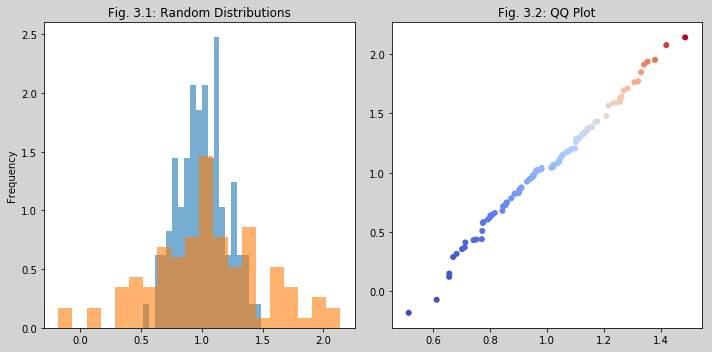

Before we analyze beta, we need a normal random distribution to compare it to. 
If beta is normally distributed, then these charts should appear similar. 
A normally distributed beta means that there are some cryptocurrencies that under-perform, 
some that outperform, but most are near-correlated to that overall cryptocurrency market.


In [255]:
# Let's create a normal random distribution that we can compare to beta

pop1 = np.random.normal(1, .2, 10000)
pop2 = np.random.normal(1, .5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample1.sort()

sample2 = np.random.choice(pop2, 100, replace=True)
sample2.sort()

plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

plt.subplot(1,2,1)
plt.hist(sample1, bins=20, density=True, alpha=0.6)
plt.hist(sample2, bins=20, density=True, alpha=0.6)
plt.ylabel('Frequency')
plt.title("Fig. 3.1: Random Distributions")

plt.subplot(1,2,2)
c = sample1**2 + sample2**2
plt.scatter(sample1, sample2, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)
plt.title("Fig. 3.2: QQ Plot")

plt.tight_layout()
plt.show()

print("Before we analyze beta, we need a normal random distribution to compare it to. \n"
     "If beta is normally distributed, then these charts should appear similar. \n"
     "A normally distributed beta means that there are some cryptocurrencies that under-perform, \n"
     "some that outperform, but most are near-correlated to that overall cryptocurrency market.")

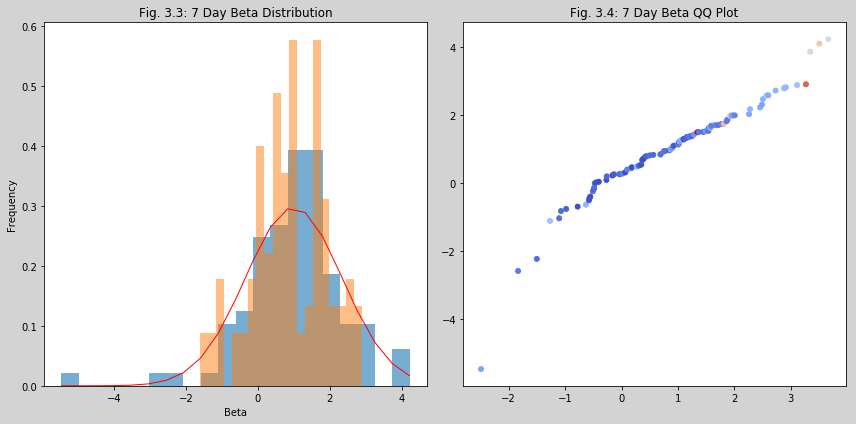

Luckily, the our beta is normally distributed, outside of a few outliers. 
The 7 day beta has a mean of 1.0 and, outside of a some outliers, it's clustered in a positive range. 
Further more, we can see from the QQ Plot that the data matches a normal distribution.


In [252]:
# now let's plot beta and compare it to the normal distribution

plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='lightgrey')

plt.subplot(1,2,1)
xy = beta_df['beta_7d']
mu, sigma = xy.mean(), xy.std()

count, bins, ignored = plt.hist(xy, 20, density=True, alpha=0.6)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=1, color='r')

plt.hist(y, bins=20, density=True, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Beta')
plt.title('Fig. 3.3: 7 Day Beta Distribution')

plt.subplot(1,2,2)
c = sample1**2 + xy**2
plt.scatter(sample1, xy.sort_values(), s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)
plt.title('Fig. 3.4: 7 Day Beta QQ Plot')

plt.tight_layout()
plt.show()

print("Luckily, the our beta is normally distributed, outside of a few outliers. \n"
     "The 7 day beta has a mean of {} and, outside of a some outliers, it's clustered in a positive range. \n"
      "Further more, we can see from the QQ Plot that the data matches a normal distribution."
      .format(np.mean(beta_df['beta_7d'])))

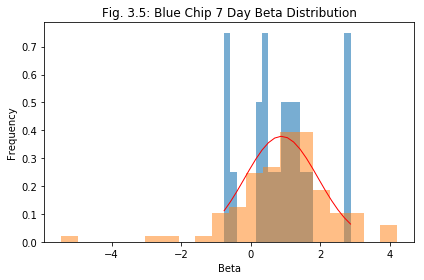

Finally, a clear representation of the comparative risk of cryptocurrency market. 
Comparing the beta of the blue chip cryptocurrencies against the beta of the rest market in Fig. 3.5 
we can see that the blue chips are more closely clustered around 1 with fewer outliers and a tigher central tendency. 
What this means is that on average, the blue chips have less inherent risk than the overall market. 
In plainer terms, we can compare the mean beta of the blue chips: 0.8876316816230979, to the mean beta of the market: 1.0, 
and the beta of Bitcoin: 0.8122821672379527, the largest cryptocurrency. 
We can see that the blue chips are approximately 13.6% less risky than the overall market compared to Bitcoin which is 
approximately 23% less risky than the overall market.


In [250]:
# now let's plot beta and compare it to the normal distribution

xy = beta_df.query('market_cap_usd > 300000000')['beta_7d']
mu, sigma = xy.mean(), xy.std()

count, bins, ignored = plt.hist(xy, 20, density=True, alpha=0.6)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=1, color='r')

plt.hist(beta_df['beta_7d'], bins=20, density=True, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Beta')
plt.title('Fig. 3.5: Blue Chip 7 Day Beta Distribution')

plt.tight_layout()
plt.show()

print("Finally, a clear representation of the comparative risk of cryptocurrency market. \n"
      "Comparing the beta of the blue chip cryptocurrencies against the beta of the rest market in Fig. 3.5 \n"
      "we can see that the blue chips are more closely clustered around 1 with fewer outliers and a tigher central tendency. \n"
      "What this means is that on average, the blue chips have less inherent risk than the overall market. \n"
      "In plainer terms, we can compare the mean beta of the blue chips: {}, to the mean beta of the market: {}, \n"
      "and the beta of Bitcoin: {}, the largest cryptocurrency. \n"
      "We can see that the blue chips are approximately 13.6% less risky than the overall market compared to Bitcoin which is \n"
      "approximately 23% less risky than the overall market."
     .format(np.mean(xy), np.mean(beta_df['beta_7d']), beta_df.loc[0,'beta_7d']))

In [225]:
print("Now that we have clearer view of the risk of the market compared to larger market cap cryptocurrencies \n"
     "and Bitcoin, we can review that data for its significance by conducting a t-test.")

Now that we have clearer view of the risk of the market compared to larger market cap cryptocurrencies 
and Bitcoin, we can review that data for its significance by conducting a t-test.


In [261]:
from scipy.stats import ttest_ind

beta_market = np.mean(beta_df['beta_7d'])
beta_blue_chip = np.mean(beta_df.query('market_cap_usd > 300000000')['beta_7d'])
beta_bitcoin = beta_df.loc[0,'beta_7d']

ttest_blue_chip = ttest_ind(beta_df.query('market_cap_usd > 300000000')['beta_7d'], sample1)
print(ttest_blue_chip)

ttest_market = ttest_ind(beta_df['beta_7d'], sample1)
print(ttest_market)

print('The t-test shows that the ')

Ttest_indResult(statistic=-1.036962707593519, pvalue=0.3018382883166222)
Ttest_indResult(statistic=-0.02844058263980521, pvalue=0.9773394022725602)
The t-test shows that the 
